# **SGD Mechanics & Attention Context Assignment1 (M4)**
---
Suchanya Baiyam Business Data Science AAU

# **Part A: Manual SGD (First 3 Samples)**
- Data: Insurance Dataset (Simple 1 input and 1 output)
- Hyperparameters: Learning Rate of 2
- Parameters: Initial Weight (W old) of 10

The Math Steps:
1. Forward: ŷ = x · w
2. Loss: L = (t - ŷ)²
3. Gradient: ∂L/∂w = 2x(ŷ - t)
4. Update: wnew = wold - α · (∂L/∂w)

| Sample | w(old)   | x  | ŷ  | dL/dw   | w(new)   |
| ------ | -------- | -- | -- | ------- | -------- |
| 1      | 10.0000   | 0.870968 | 8.70968 | 13.5523 | -17.1046 |
| 2      | -17.1046 | 0.153226 | -2.6203 | -0.8367 | -15.4312 |
| 3      | -15.4312 | 0.104839 | -1.6180 | -0.3470 | -14.7372 |

In [55]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
from tqdm import tqdm_notebook

In [56]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

In [57]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_s = pd.DataFrame(data_scaled, columns=data.columns)

In [58]:
data_s.head(3)

,X,Y
0,0.870968,0.929654
1,0.153226,0.109427
2,0.104839,0.037186


In [59]:
# Initializing Hyperparameters
epochs = 1
learning_rate = 2

# Initializing Parameters
w = 10

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
def nn(x, w):
    """Output function y = x * w"""
    return x * w

# 1.2 Loss Function
def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

# 1.3 Optmization Approach
def gradient(w, x, t):
    """Compute the gradient."""
    y = x * w
    return np.mean(2 * x * (y - t))

def delta_w(w_i, x, t, learning_rate):
    """Compute the weight update."""
    return learning_rate * gradient(w_i, x, t)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in range(epochs):
    total_loss = 0
    for i in range(3):
        x_i, t_i = data_s['X'][i], data_s['Y'][i]

        # 2. Forward Pass
        output = nn(x_i, w)

        # 3. FeedForward Evaluation
        loss_val = loss(output, t_i)

        # 4. Backward Pass / Gradient Calculation
        grad_value = gradient(w, x_i, t_i)  # Compute gradientF
        dw = delta_w(w, x_i, t_i, learning_rate)

        # 5. Back Propagation / Update Weights
        w = w - dw

        # print to verify the table
        print(
            f"Verify Sample {i+1} | "
            f"x = {x_i:.6f}, "
            f"ŷ = {output:.4f}, "
            f"dL/dw = {grad_value:.4f}, "
            f"Δw = {dw:.4f}, "
            f"w(new) = {w:.4f}"
        )

        w_his.append(w)

        # Accumulate loss
        total_loss += loss_val

        # Print gradient, dw, weight, and loss values in a single line
        print(f"Epoch {epoch+1}, Sample {i+1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

    # Print average loss for the epoch
    avg_loss = total_loss / len(data_s['X'])
    print(f"Epoch {epoch+1}: Average Loss = {avg_loss:.4f}\n")


Verify Sample 1 | x = 0.870968, ŷ = 8.7097, dL/dw = 13.5523, Δw = 27.1046, w(new) = -17.1046
Epoch 1, Sample 1: Gradient = 13.5523, Δw = 27.1046, w: -17.1046, loss: 60.5288
Verify Sample 2 | x = 0.153226, ŷ = -2.6209, dL/dw = -0.8367, Δw = -1.6734, w(new) = -15.4312
Epoch 1, Sample 2: Gradient = -0.8367, Δw = -1.6734, w: -15.4312, loss: 7.4545
Verify Sample 3 | x = 0.104839, ŷ = -1.6178, dL/dw = -0.3470, Δw = -0.6940, w(new) = -14.7372
Epoch 1, Sample 3: Gradient = -0.3470, Δw = -0.6940, w: -14.7372, loss: 2.7389
Epoch 1: Average Loss = 1.1226



| Sample | w(old)   | x  | ŷ  | dL/dw   | w(new)   |
| ------ | -------- | -- | -- | ------- | -------- |
| 1      | 10.0000   | 0.870968 | 8.70968 | 13.5523 | -17.1046 |
| 2      | -17.1046 | 0.153226 | -2.6203 | -0.8367 | -15.4312 |
| 3      | -15.4312 | 0.104839 | -1.6180 | -0.3470 | -14.7372 |

In [60]:
output

np.float64(-1.6177862554669014)

In [61]:
grad_value

np.float64(-0.34701034679159987)

In [62]:
dw

np.float64(-0.6940206935831997)

In [63]:
w

np.float64(-14.737171281639553)

# **What we found**
The results show the updates of the weight using stochastic Gradient Descent (SGD) for the first three samples.

For each sample, the gradient determines both the direction and magnitude of the weight update. A large positive gradient in the first sample causes a large descrease in the weight, while smaller gradients in the later samples lead to smaller updates.

This demonstrates how individual samples influence parameter updates in SGD.




---


# **Part B: Attention Contexualization**

**Task**: Pick a homonym (e.g., bat, seal, bow, fine) and create two sentences with different meanings.

**Sentences:**
- S1 - The seal is swimming in the ocean. (Seal = animal)
- S2 - Please seal the envelope before sending it. (Seal = close)

**Embeddings**: Initialize small 2D vectors for each token.

**Attention:** Calculate A = softmax(QKᵀ) where Q=K=V=E.

**Validation:** Use Cosine Similarity or Euclidean Distance to show the shift.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [65]:
# Provided word embeddings #assisted by chatgpt
embeddings = {
    "the": np.array([0.1, 0.1]),
    "seal": np.array([0.4, 0.4]),
    "is": np.array([0.0, 0.1]),
    "swimming": np.array([0.9, 0.2]),
    "in": np.array([0.0, 0.0]),
    "ocean": np.array([0.8, 0.3]),

    "please": np.array([0.1, 0.3]),
    "envelope": np.array([0.6, 0.8]),
    "before": np.array([0.2, 0.2]),
    "sending": np.array([0.7, 0.6]),
    "it": np.array([0.0, 0.2]),
}

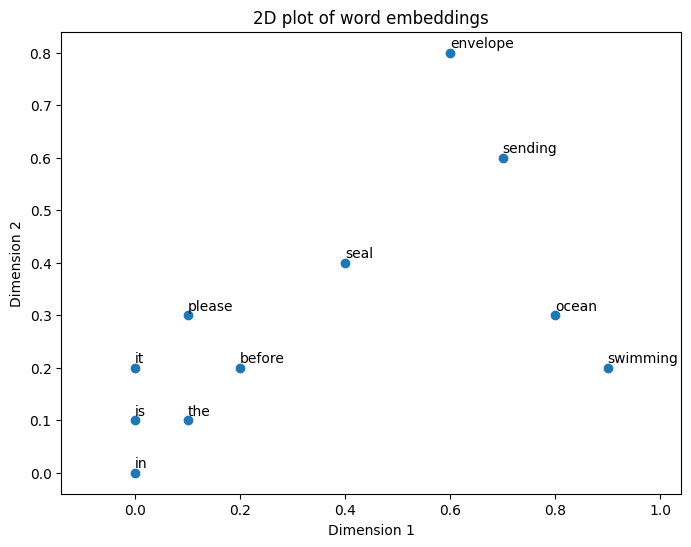

In [66]:
# Extract the coordinates for 2D plotting
x_2d_adj = [embeddings[word][0] for word in embeddings]
y_2d_adj = [embeddings[word][1] for word in embeddings]
words_2d_adj = list(embeddings.keys())

# Create a 2D plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter the points
ax.scatter(x_2d_adj, y_2d_adj)

# Annotate the points with words
for i, word in enumerate(words_2d_adj):
    ax.text(x_2d_adj[i], y_2d_adj[i] + 0.01, word)  # Adjust text position for clarity

# Set labels
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('2D plot of word embeddings')

# Set equal scaling
ax.axis('equal')

# Show the plot
plt.show()

In [67]:
sentence1 = ["the","seal", "is", "swimming", "in", "the", "ocean"]
# Initialize matrices for Q, K, V for sentence 1
Q1 = np.array([embeddings[word] for word in sentence1])
K1 = np.array([embeddings[word] for word in sentence1])
V1 = np.array([embeddings[word] for word in sentence1])
# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores1 = Q1.dot(K1.T)
# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
attention_weights1 = np.apply_along_axis(softmax, 1, attention_scores1)
# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output1 = attention_weights1.dot(V1)

In [68]:
sentence2 = ["please", "seal", "the", "envelope", "before", "sending", "it"]
# Initialize matrices for Q, K, V for sentence 2
Q2 = np.array([embeddings[word] for word in sentence2])
K2 = np.array([embeddings[word] for word in sentence2])
V2 = np.array([embeddings[word] for word in sentence2])
# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores2 = Q2.dot(K2.T)
# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
attention_weights2 = np.apply_along_axis(softmax, 1, attention_scores2)
# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output2 = attention_weights2.dot(V2)

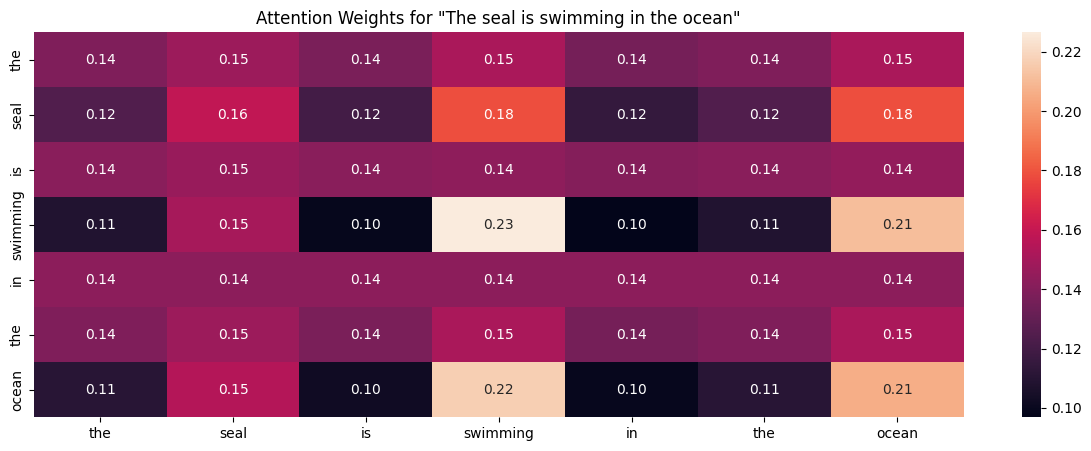

In [69]:
# Set up the plot for sentence 1
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Sentence 1: "The seal is swimming in the ocean"
# Create a heatmap for the attention weights of the first sentence
sns.heatmap(attention_weights1, annot=True, fmt=".2f", xticklabels=sentence1, yticklabels=sentence1)
axes.set_title('Attention Weights for "The seal is swimming in the ocean"')

plt.show()

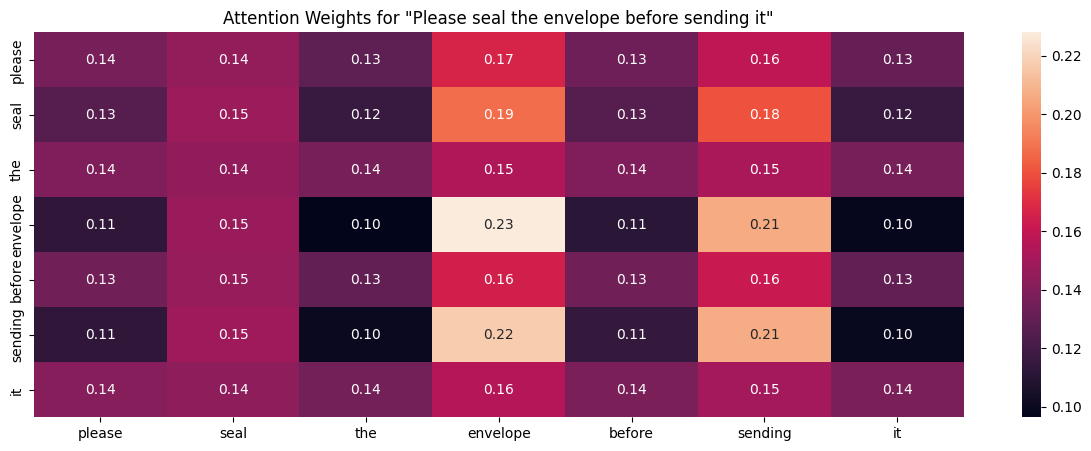

In [70]:
# Set up the plot for sentence 2
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Sentence 1: "Please seal the envelope before sending it"
# Create a heatmap for the attention weights of the first sentence
sns.heatmap(attention_weights2, annot=True, fmt=".2f", xticklabels=sentence2, yticklabels=sentence2)
axes.set_title('Attention Weights for "Please seal the envelope before sending it"')

plt.show()

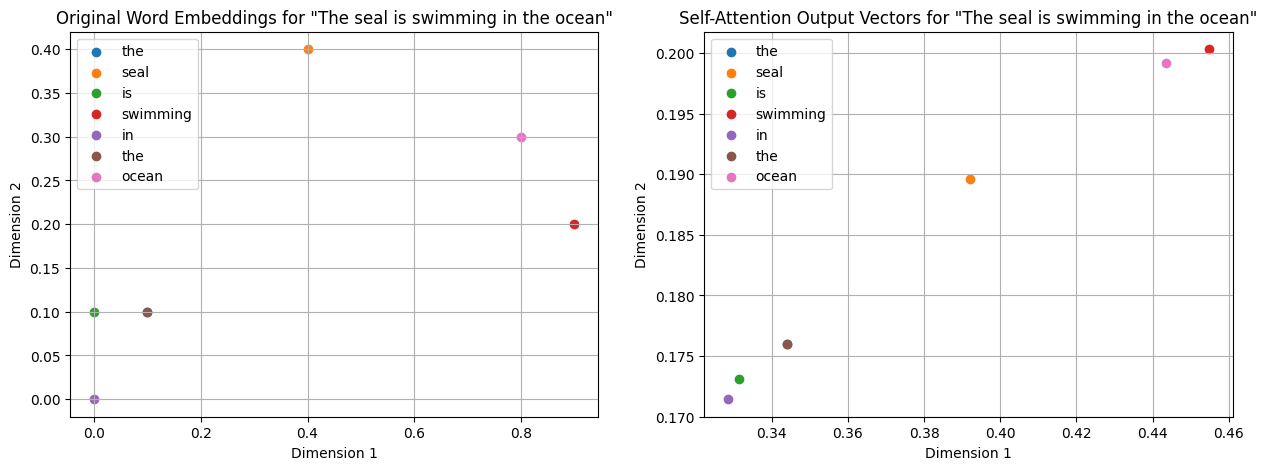

In [71]:
# Plotting the original embeddings and the attention output for the first sentence "The seal is swimming in the ocean"

# Extract the relevant embeddings for the first sentence
sentence_embeddings1 = np.array([embeddings[word] for word in sentence1])

# Reconstruct attention_output_array1 to match the current sentence1
# attention_output1 was calculated for the first 5 words.
# We need to append the embedding of 'Seal' to match the 7-word sentence_1.
attention_output_array1 = np.concatenate((attention_output1, embeddings['seal'].reshape(1, -1)), axis=0)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence1):
    axes[0].scatter(sentence_embeddings1[i, 0], sentence_embeddings1[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for "The seal is swimming in the ocean"')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot output vectors
for i, word in enumerate(sentence1):
    axes[1].scatter(attention_output_array1[i, 0], attention_output_array1[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for "The seal is swimming in the ocean"')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()

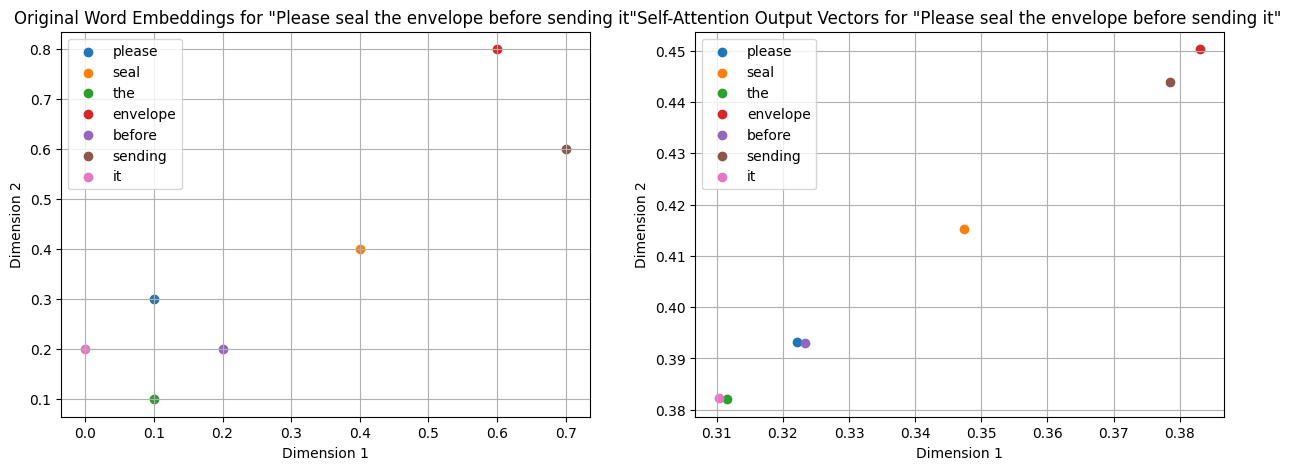

In [72]:
# Plotting the original embeddings and the attention output for the second sentence "Please seal the envelope before sending it"

# Extract the relevant embeddings for the second sentence
sentence_embeddings2 = np.array([embeddings[word] for word in sentence2])

# Reconstruct attention_output_array1 to match the current sentence1
# attention_output1 was calculated for the first 5 words.
# We need to append the embedding of 'Seal' to match the 7-word sentence_1.
attention_output_array2 = np.concatenate((attention_output2, embeddings['seal'].reshape(1, -1)), axis=0)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence2):
    axes[0].scatter(sentence_embeddings2[i, 0], sentence_embeddings2[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for "Please seal the envelope before sending it"')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot output vectors
for i, word in enumerate(sentence2):
    axes[1].scatter(attention_output_array2[i, 0], attention_output_array2[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for "Please seal the envelope before sending it"')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()

In [73]:
# Calculate the Euclidean distance between "Seal" and "Envelope" in the original embeddings for the second sentence
original_ocean = embeddings["ocean"]
original_seal = embeddings["seal"]  # The same embedding for "seal" is used as in the first sentence
distance_original = np.linalg.norm(original_ocean - original_seal)

# Find the positions of "Seal" and "Envelope" in the second sentence
envelope_position = sentence2.index("envelope")
seal_position = sentence2.index("seal")

# Calculate the Euclidean distance between "Seal" and "bank" in the output vectors for the second sentence
output_ocean = attention_output1[envelope_position]
output_seal = attention_output1[seal_position]
distance_output = np.linalg.norm(output_ocean - output_seal)

distance_original, distance_output


(np.float64(0.4123105625617661), np.float64(0.06350177626958645))

# **What we found:**
In the original embeddings, the distance between "seal" and "envelope" is relatively large because static embeddings do not encode contexual relationships. (original distance approximated at 0.41)

After applying self-attention, the distance becomes much smaller, indicating that "seal" incorporates contexual information from surrounding words such as "envelope". (after attention the distance approximated at 0.064)

This demonstrates that self-attention produces context-aware representations.

